In [1]:
import os
from pandas import DataFrame
import pandas as pd

import matplotlib.pyplot as plt
plt.close('all')

import seaborn as sns
%matplotlib inline

# Visualize Functional Analysis - Summary

In [2]:
df_slim = pd.DataFrame(columns=['GO_ID', 'Category', 'Pathway'])
file = os.listdir()

for a in range(len(file)):
    if 'slim.csv' in file[a]:
        sample_ID = file[a].replace('_FASTQ_GO_slim.csv', '')
        x = pd.read_csv(file[a], header=None)
        x.columns = ['GO_ID', 'Category', 'Pathway', sample_ID]
        x[sample_ID] = (x[sample_ID] / x[sample_ID].sum()) * 100
        #print(x.head())
        df_slim = pd.merge(x, df_slim, on=['GO_ID','Category','Pathway'], how='left')

df_slim.head()

,GO_ID,Category,Pathway,ERR833442,ERR476421
0,GO:0030031,cell projection assembly,biological_process,0.003444,0.004813
1,GO:0071554,cell wall organization or biogenesis,biological_process,0.016357,0.192502
2,GO:0016043,cellular component organization,biological_process,0.238474,0.255065
3,GO:0051301,cell division,biological_process,0.052516,0.014438
4,GO:0016049,cell growth,biological_process,0.000000,0.000000


In [58]:
df_slim_sum = df_slim.drop(columns=['GO_ID','Pathway'])
df_slim_sum = df_slim_sum.set_index('Category')
df_slim_sum.describe()

,ERR833442,ERR476421
count,116.000000,116.000000
mean,0.862069,0.862069
std,1.502199,1.471264
min,0.000000,0.000000
25%,0.020447,0.024063
50%,0.210925,0.206940
75%,0.901812,0.778430
max,7.479661,7.358391


In [59]:
df_slim_sum['total'] = df_slim_sum.sum(axis=1)
df_slim_sum['total'] = df_slim_sum['total']/2
df_slim_sum = df_slim_sum.sort_values('total', ascending=False)
df_slim_sum.head()

,ERR833442,ERR476421,total
Category,,,
nitrogen compound metabolic process,7.479661,7.358391,7.419026
biosynthetic process,7.298007,6.588383,6.943195
nucleotide binding,6.115966,4.952115,5.534040
oxidation-reduction process,4.613663,5.462246,5.037954
oxidoreductase activity,4.069562,5.702873,4.886218


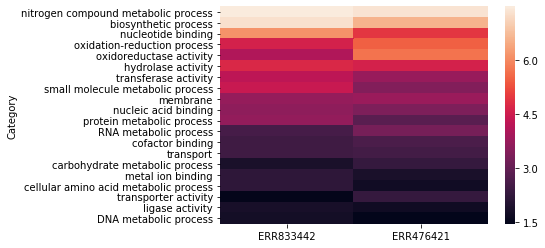

In [63]:
df_heatmap = df_slim_sum.drop(columns=['total'])
sns.heatmap(df_heatmap[:20])#, annot=True, linewidths=.25)

# Detailed GO

In [64]:
df_GO = pd.DataFrame(columns=['GO_ID', 'Category', 'Pathway'])
file = os.listdir()

for a in range(len(file)):
    if 'FASTQ_GO.csv' in file[a]:
        sample_ID = file[a].replace('_FASTQ_GO.csv', '')
        x = pd.read_csv(file[a], header=None)
        x.columns = ['GO_ID', 'Category', 'Pathway', sample_ID]
        x[sample_ID] = (x[sample_ID] / x[sample_ID].sum()) * 100
        #print(x.head())
        df_GO = pd.merge(x, df_GO, on=['GO_ID','Category','Pathway'], how='left')

df_GO.head()

,GO_ID,Category,Pathway,ERR833442,ERR476421
0,GO:0055114,oxidation-reduction process,biological_process,5.135852,6.113513
1,GO:0008152,metabolic process,biological_process,3.422434,4.955105
2,GO:0006810,transport,biological_process,1.352467,1.596275
3,GO:0009058,biosynthetic process,biological_process,1.318352,0.698370
4,GO:0006418,tRNA aminoacylation for protein translation,biological_process,1.171991,0.460038


In [65]:
df_GO_sum = df_GO.drop(columns=['GO_ID','Pathway'])
df_GO_sum = df_GO_sum.set_index('Category')
df_GO_sum.describe()

,ERR833442,ERR476421
count,1459.000000,810.000000
mean,0.068540,0.119673
std,0.329020,0.480137
min,0.001100,0.005543
25%,0.002201,0.011085
50%,0.009904,0.022170
75%,0.035215,0.060969
max,6.119664,6.723201


In [66]:
df_GO_sum['total'] = df_GO_sum.sum(axis=1)
df_GO_sum['total'] = df_GO_sum['total']/2
df_GO_sum = df_GO_sum.sort_values('total', ascending=False)
df_GO_sum.head()

,ERR833442,ERR476421,total
Category,,,
catalytic activity,6.119664,6.723201,6.421433
oxidation-reduction process,5.135852,6.113513,5.624682
ATP binding,6.012919,4.495067,5.253993
metabolic process,3.422434,4.955105,4.188769
oxidoreductase activity,2.432019,3.342202,2.887110


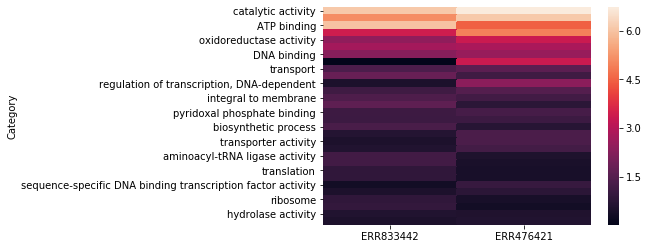

In [70]:
df_heatmap = df_GO_sum.drop(columns=['total'])
sns.heatmap(df_heatmap[:30])#, annot=True, linewidths=.25)

# Interpro

In [123]:
df = pd.read_csv('ERR476421_FASTQ_I5.tsv', header=None, sep='\n')
df = df[0].str.split('\t', expand=True)
df.columns = ['Protein_accession',
              'Sequence_MD5_digest',
              'Sequence_length',
              'Analysis',
              'Signature_accession',
              'Signature_description',
              'Start_location',
              'Stop_location',
              'Score',
              'Status',
              'Date',
              'Interpro_accession',
              'Interpro_description',
              'GO_annotations']
df.head()

,Protein_accession,Sequence_MD5_digest,Sequence_length,Analysis,Signature_accession,Signature_description,Start_location,Stop_location,Score,Status,Date,Interpro_accession,Interpro_description,GO_annotations
0,MISEQ:128:000000000-A7920:1:2112:6554:7576_1:N...,cee941ec0f7ae624dd343bc45363ce80,60,Gene3D,G3DSA:1.10.287.240,,4,60,3.3E-4,T,23-04-2014,None,None,None
1,MISEQ:128:000000000-A7920:1:2112:6554:7576_1:N...,cee941ec0f7ae624dd343bc45363ce80,60,Pfam,PF00512,His Kinase A (phosphoacceptor) domain,3,60,5.9E-5,T,23-04-2014,IPR003661,"Signal transduction histidine kinase, subgroup...",GO:0000155|GO:0016020|GO:0007165
2,MISEQ:128:000000000-A7920:1:1119:7006:6395_1:N...,50e5b5318d58d7ddb53ce8de7216377f,61,Gene3D,G3DSA:3.40.50.150,,12,54,7.1E-5,T,23-04-2014,None,None,None
3,MISEQ:128:000000000-A7920:1:1111:11446:19950_1...,3dd6a555bfec31e658d7fdd775edcd8,62,Pfam,PF10531,SLBB domain,1,39,0.096,T,23-04-2014,IPR019554,Soluble ligand binding domain,
4,MISEQ:128:000000000-A7920:1:2114:22496:20425_1...,d99eff4eaa8e407cee62be1bf978ccb,62,Pfam,PF01336,OB-fold nucleic acid binding domain,1,44,5.4E-5,T,23-04-2014,IPR004365,"Nucleic acid binding, OB-fold, tRNA/helicase-type",GO:0003676
